### The main aim of this project is to analyze and predict traffic congestion levels for better traffic management and reduction of congestion in urban areas



In [2]:
import pandas as pd
import numpy as np
#importing the necessary libraries

df = pd.read_csv("Banglore_traffic_Dataset.csv")

In [3]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,01-01-2022,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,01-01-2022,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,01-01-2022,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,01-01-2022,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,01-01-2022,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [5]:
df.isnull().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [6]:
df.describe()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348
std,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573
min,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000
25%,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000
50%,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000
75%,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000
max,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000


In [7]:
print(df.duplicated().sum())

0


### traffic count - high variablity suggests some areas or times experience much higher traffic than others
this indicates larger differences in traffic density depending on factors like time of day, or day of the week

### Average speed - lower speeds likley correspond to high congestion levels

### Travel Time Index - it indicates travel time which is relative to free-flow conditions.
Min value is 1 and max value is 1.5 suggests significant delays during peak times 

### Congestion Level- Highly congested areas dominate the dataset. this makes it crucial to check for data imbalance 

### Road Capacity Utilization- Most roads are being heavily utilized which alings with the height congestion levels 

### Incident Reports - Incidents are rare but could be significant outliers affecting congestion

### Environmental Impact - This metric may correlate with traffic density and volume

### Public Transport Usage - Variations might highlight areas with better or worse public transport accessibility

### Traffic Signal Compliance - Areas with low compliance could face higher congestion3

### Parking Usage -  High parking usage might indicate higher vehicle density.

### Pedestrian and Cyclist Count - High counts might correlate with congestion in pedestrian-heavy areas.


<Axes: ylabel='Traffic Volume'>

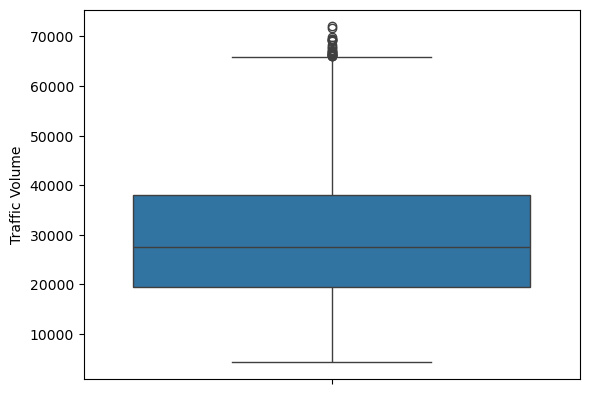

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Traffic Volume'])

(array([[8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 130., 1060., 1538., 2060., 1478., 1284.,  794.,  351.,  202.,
           39.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [8936.,    0.

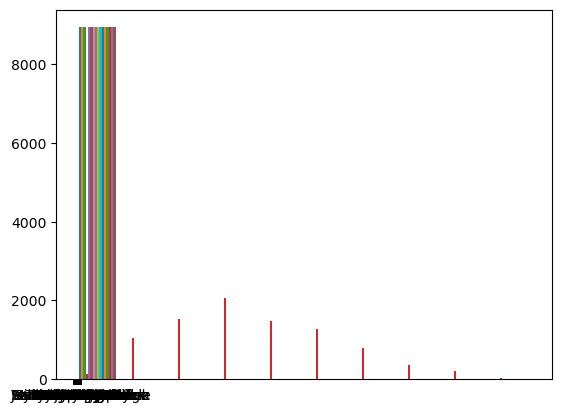

In [20]:
plt.hist(df)

In [21]:
import folium

# Create a map centered on Bangalore
m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Add a marker or other features based on the traffic data
folium.Marker([12.9716, 77.5946], popup='Traffic Incident').add_to(m)

# Display the map
m


In [22]:
df.isnull().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [23]:
dataset = df.copy()
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']  #o means object
print("number of numerical variables is " , len(numerical_features))
dataset[numerical_features].head()

number of numerical variables is  11


,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111
1,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100
2,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189
3,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111
4,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104


### Temporal varibales (eg datetime variables )


In [25]:
#printing the unique values
for feature in dataset:
    print(feature, dataset[feature].unique())

Date ['01-01-2022' '02-01-2022' '03-01-2022' '04-01-2022' '05-01-2022'
 '06-01-2022' '07-01-2022' '08-01-2022' '09-01-2022' '10-01-2022'
 '11-01-2022' '12-01-2022' '13-01-2022' '14-01-2022' '15-01-2022'
 '16-01-2022' '17-01-2022' '18-01-2022' '19-01-2022' '20-01-2022'
 '21-01-2022' '22-01-2022' '23-01-2022' '24-01-2022' '25-01-2022'
 '26-01-2022' '27-01-2022' '28-01-2022' '29-01-2022' '30-01-2022'
 '31-01-2022' '01-02-2022' '02-02-2022' '03-02-2022' '04-02-2022'
 '05-02-2022' '06-02-2022' '07-02-2022' '08-02-2022' '09-02-2022'
 '10-02-2022' '11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022'
 '15-02-2022' '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022'
 '20-02-2022' '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022'
 '25-02-2022' '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022'
 '02-03-2022' '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022'
 '07-03-2022' '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022'
 '12-03-2022' '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022'
 '17-

In [26]:
import requests

url = "http://overpass-api.de/api/interpreter"
query = """
[out:json];
node["highway"="traffic_signals"](12.95,77.58,13.05,77.68);
out;
"""
response = requests.get(url, params={"data": query})
data = response.json()
print(data)


{'version': 0.6, 'generator': 'Overpass API 0.7.62.4 2390de5a', 'osm3s': {'timestamp_osm_base': '2025-01-23T17:10:00Z', 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}, 'elements': [{'type': 'node', 'id': 26529522, 'lat': 12.9746109, 'lon': 77.6200447, 'tags': {'highway': 'traffic_signals'}}, {'type': 'node', 'id': 26529553, 'lat': 12.9815923, 'lon': 77.6232203, 'tags': {'crossing': 'traffic_signals', 'highway': 'traffic_signals'}}, {'type': 'node', 'id': 60952260, 'lat': 12.9661186, 'lon': 77.6067621, 'tags': {'highway': 'traffic_signals'}}, {'type': 'node', 'id': 60952288, 'lat': 12.9580248, 'lon': 77.6059822, 'tags': {'alt_name': 'CMP Junction', 'crossing': 'traffic_signals', 'highway': 'traffic_signals', 'junction': 'yes', 'name': 'Elgin Junction', 'traffic_signals:sound': 'no'}}, {'type': 'node', 'id': 60952294, 'lat': 12.9599337, 'lon': 77.6019168, 'tags': {'highway': 'traffic_signals'}}, {'type': 'node', 'i

Text(0.5, 1.0, 'Congestion Level VS Traffic Volume')

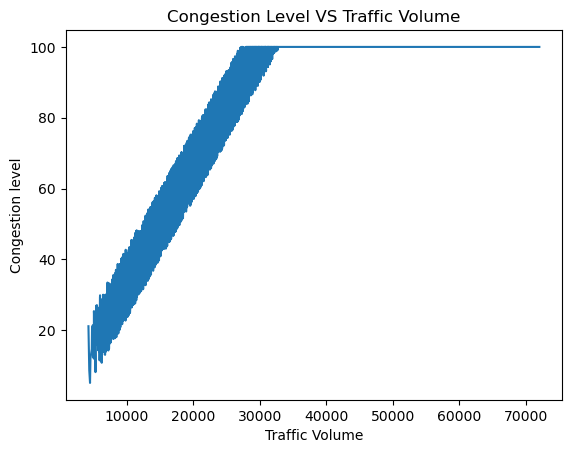

In [27]:
dataset.groupby('Traffic Volume')['Congestion Level'].median().plot()
plt.xlabel('Traffic Volume')
plt.ylabel('Congestion level')
plt.title('Congestion Level VS Traffic Volume')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_features = df.select_dtypes(include = ['float64', 'int64'])

In [29]:
numerical_features

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111
1,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100
2,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189
3,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111
4,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104
...,...,...,...,...,...,...,...,...,...,...,...
8931,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211
8932,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95
8933,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110
8934,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94


In [30]:
#calculating the correlation matrix
correlation_matrix = numerical_features.corr()


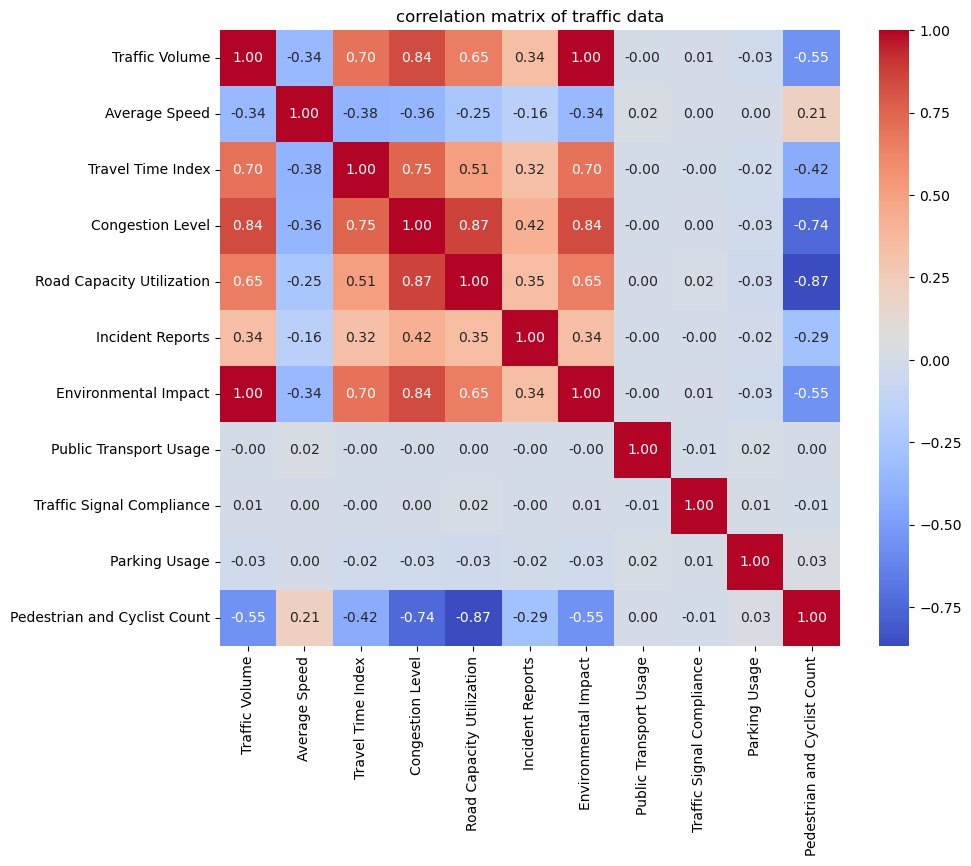

In [31]:
#Plotting the correlation matrix as heatmap
plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap= "coolwarm", fmt = '.2f', cbar = True)
plt.title("correlation matrix of traffic data")
plt.show()

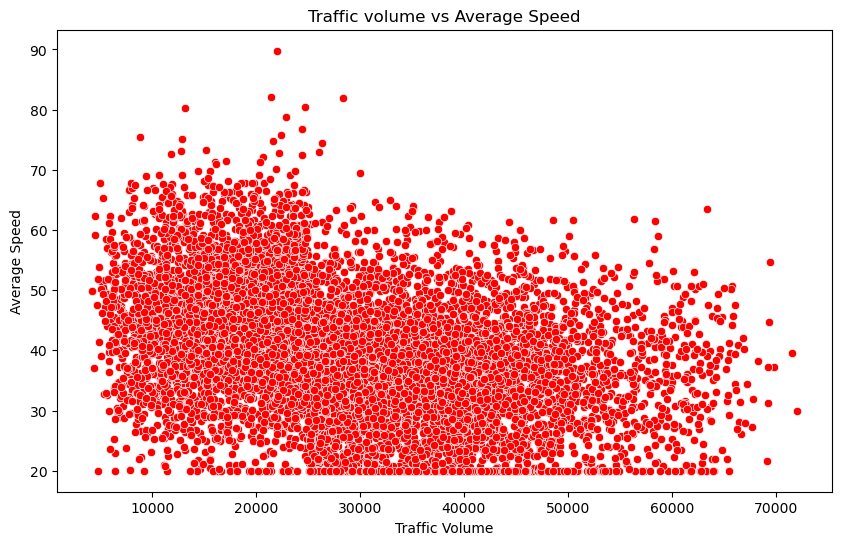

In [32]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= "Traffic Volume", y = "Average Speed", data = numerical_features, color = "red")
plt.title("Traffic volume vs Average Speed")
plt.xlabel("Traffic Volume")
plt.ylabel("Average Speed")
plt.show()

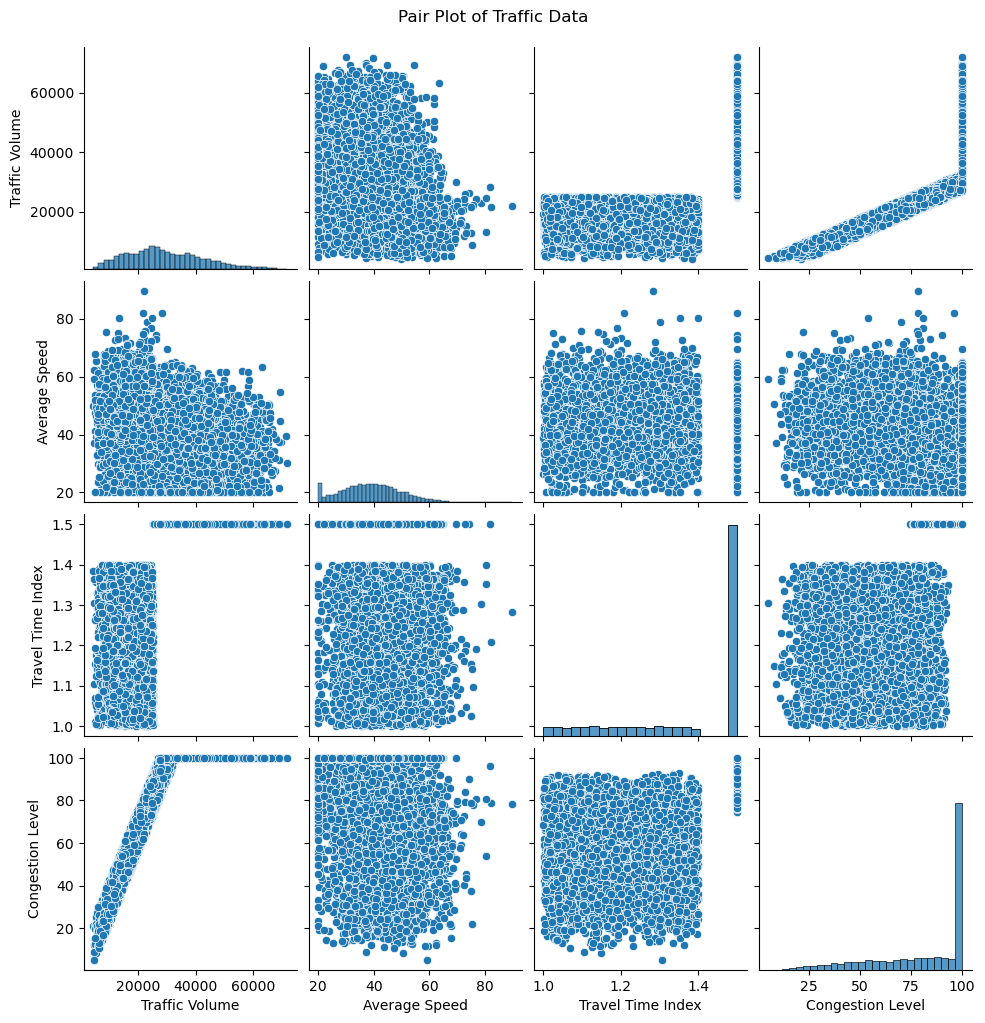

In [33]:
# Select relevant numerical columns for the pair plot
numerical_columns = ['Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level']
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot of Traffic Data", y=1.02)
plt.show()


### converting the date column to datetime format

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [36]:
df.info()
#now the date is into the proper format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8936 non-null   datetime64[ns]
 1   Area Name                           8936 non-null   object        
 2   Road/Intersection Name              8936 non-null   object        
 3   Traffic Volume                      8936 non-null   int64         
 4   Average Speed                       8936 non-null   float64       
 5   Travel Time Index                   8936 non-null   float64       
 6   Congestion Level                    8936 non-null   float64       
 7   Road Capacity Utilization           8936 non-null   float64       
 8   Incident Reports                    8936 non-null   int64         
 9   Environmental Impact                8936 non-null   float64       
 10  Public Transport Usage  

### grouping the data by date and calculate the average traffic volume

In [38]:
df_daily = df.groupby('Date').agg({'Traffic Volume': 'mean'}).reset_index()


### plotting

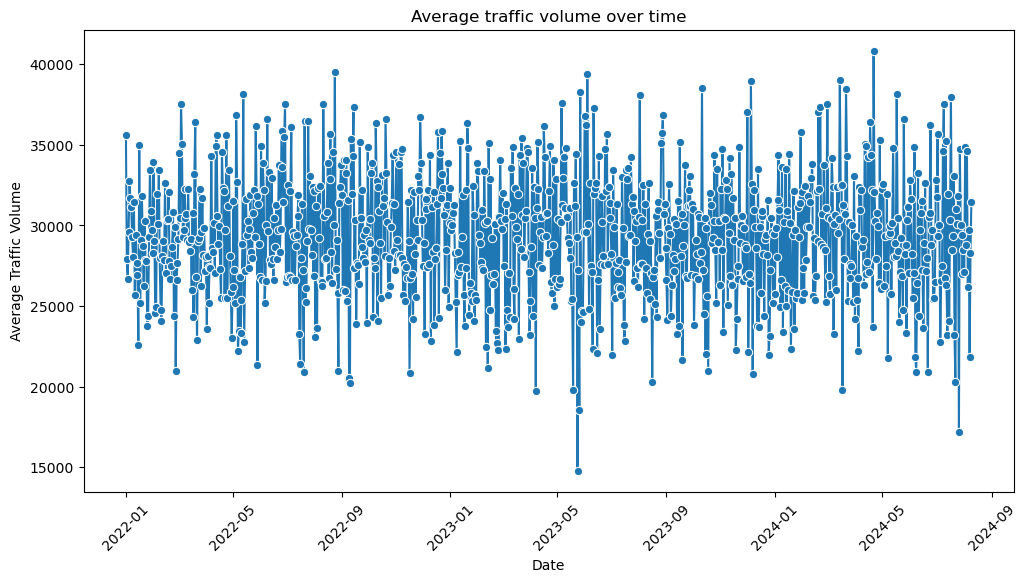

In [40]:
plt.figure(figsize = (12,6))
sns.lineplot(x='Date', y = 'Traffic Volume', data = df_daily, marker = 'o')
plt.title('Average traffic volume over time')
plt.xlabel("Date")
plt.ylabel("Average Traffic Volume")
plt.xticks(rotation = 45)
plt.show()

In [41]:
df

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,No
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,No
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,No
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,No


C:\Users\akash\AppData\Local\Temp\ipykernel_15912\3211962712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Road/Intersection Name', y = 'Congestion Level', data = df, palette = 'mako')


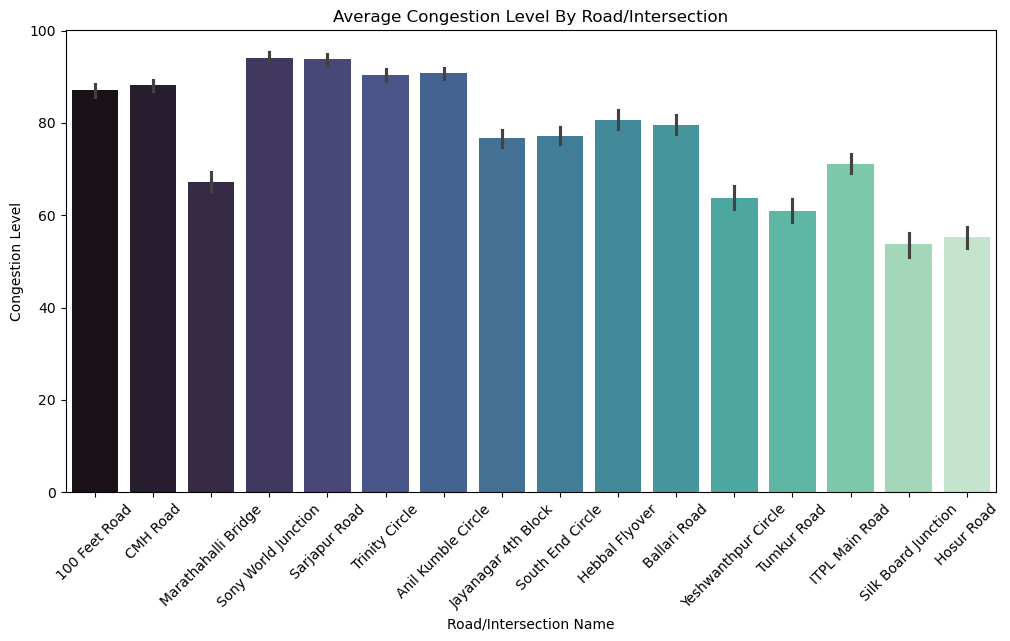

In [42]:
#bar plot of congestion level by Road / Intersection Name
plt.figure(figsize = (12,6))
sns.barplot(x = 'Road/Intersection Name', y = 'Congestion Level', data = df, palette = 'mako')
plt.title("Average Congestion Level By Road/Intersection")
plt.xlabel("Road/Intersection Name")
plt.ylabel("Congestion Level")
plt.xticks(rotation = 45)
plt.show()
        

### Boxplot to compare traffic volume across different roads 

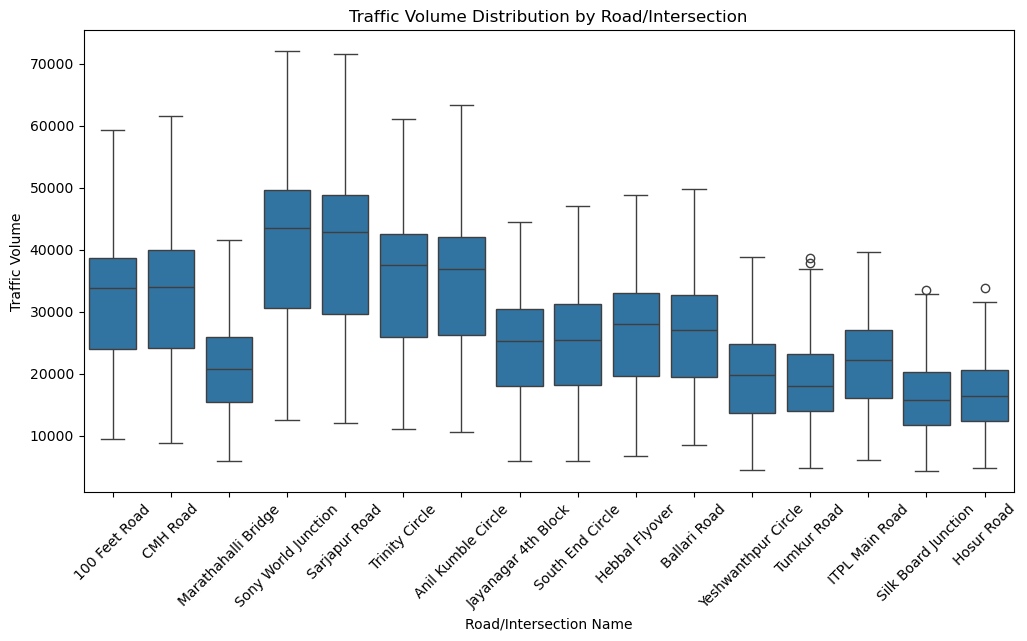

In [44]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "Road/Intersection Name", y = "Traffic Volume", data = df)
plt.title("Traffic Volume Distribution by Road/Intersection")
plt.xlabel("Road/Intersection Name")
plt.ylabel("Traffic Volume")
plt.xticks(rotation = 45)
plt.show()

### Scatter Plot for Traffic Volume vs Environmental Impact

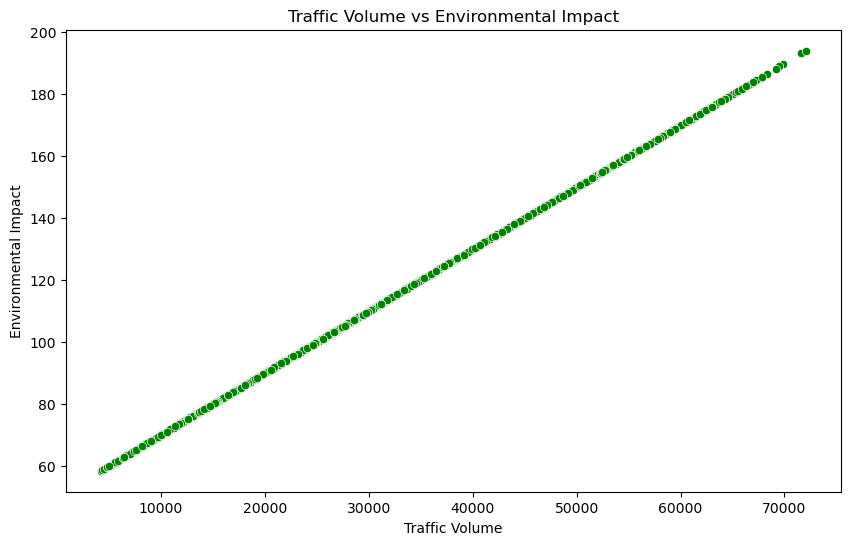

In [46]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="Traffic Volume", y = "Environmental Impact", data = df, color = "green")
plt.title("Traffic Volume vs Environmental Impact")
plt.xlabel("Traffic Volume")
plt.ylabel("Environmental Impact")
plt.show()


### One hot Encoding- it converts categories into binary columns (0 or 1) for each unique category

In [48]:
df['Weather Conditions'].unique()

array(['Clear', 'Overcast', 'Fog', 'Rain', 'Windy'], dtype=object)

In [49]:
# data = {'Weather Conditions' : ["Clear", "Rain", "Fog", "Clear"]}
# df = pd.DataFrame(data)
# encoded_df = pd.get_dummies(df, columns = ['Weather Conditions'])

In [50]:
# print(encoded_df)

C:\Users\akash\AppData\Local\Temp\ipykernel_15912\2301811133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weather Conditions", y="Traffic Volume", data=df, palette="muted")


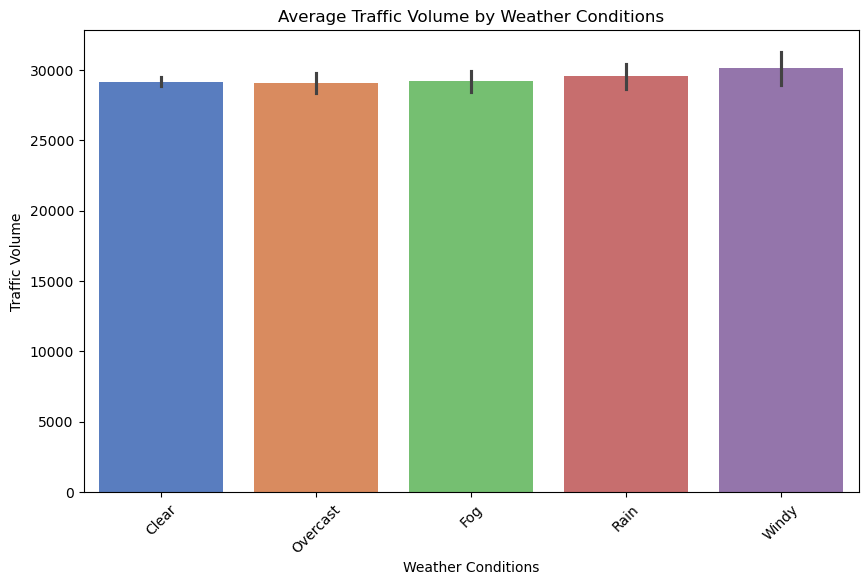

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Weather Conditions", y="Traffic Volume", data=df, palette="muted")
plt.title("Average Traffic Volume by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_15912\1071864461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather Conditions", y="Traffic Volume", data=df, palette="Set2")


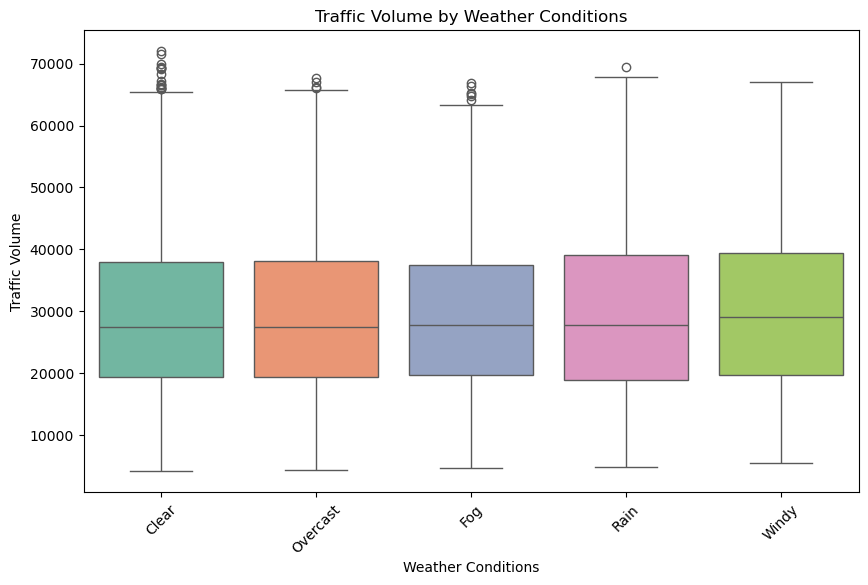

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Weather Conditions", y="Traffic Volume", data=df, palette="Set2")
plt.title("Traffic Volume by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_15912\3171240932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Weather Conditions", y="Traffic Volume", data=df, palette="coolwarm")


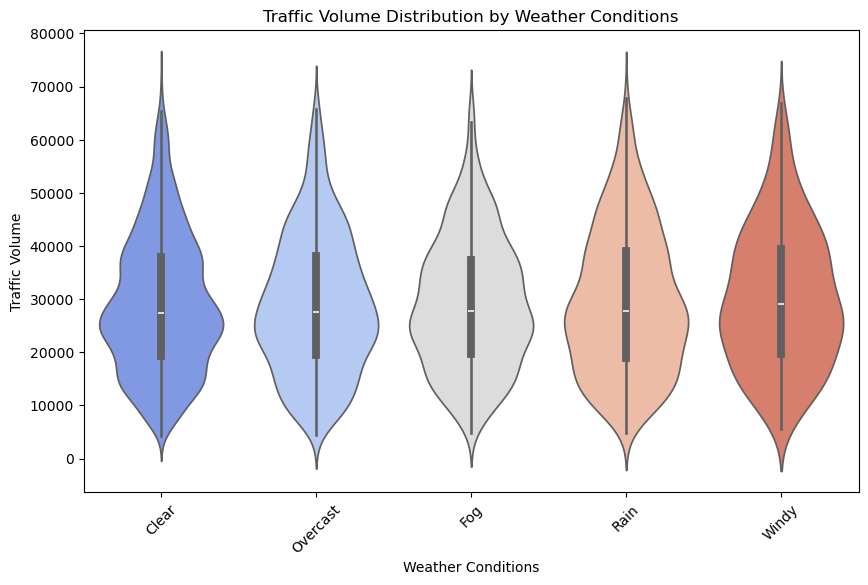

In [53]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Weather Conditions", y="Traffic Volume", data=df, palette="coolwarm")
plt.title("Traffic Volume Distribution by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.show()

In [54]:
# Check the distribution of Congestion Level
print(df['Environmental Impact'].value_counts())

Environmental Impact
99.668     4
111.162    4
109.610    3
91.252     3
80.038     3
          ..
84.190     1
81.518     1
92.804     1
98.884     1
79.410     1
Name: count, Length: 8100, dtype: int64


C:\Users\akash\AppData\Local\Temp\ipykernel_15912\2411720846.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = "Congestion Level", data = df, palette = "viridis")


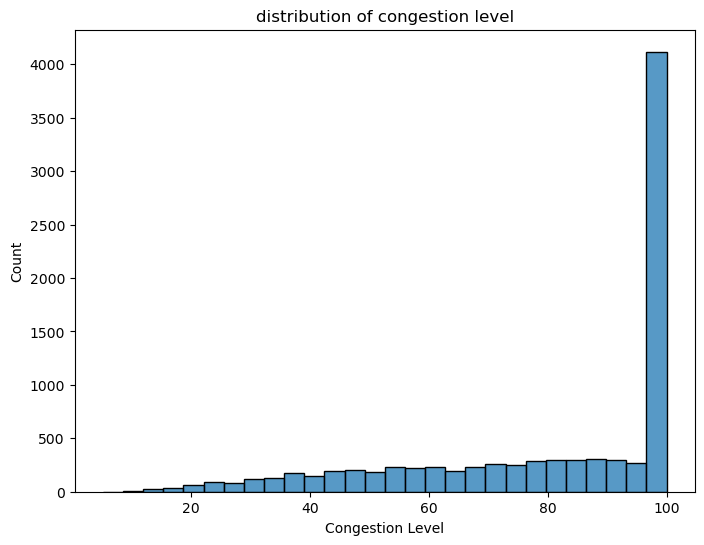

In [55]:
plt.figure(figsize = (8,6))
sns.histplot(x = "Congestion Level", data = df, palette = "viridis")
plt.title("distribution of congestion level")
plt.xlabel("Congestion Level")
plt.ylabel("Count")
plt.show()

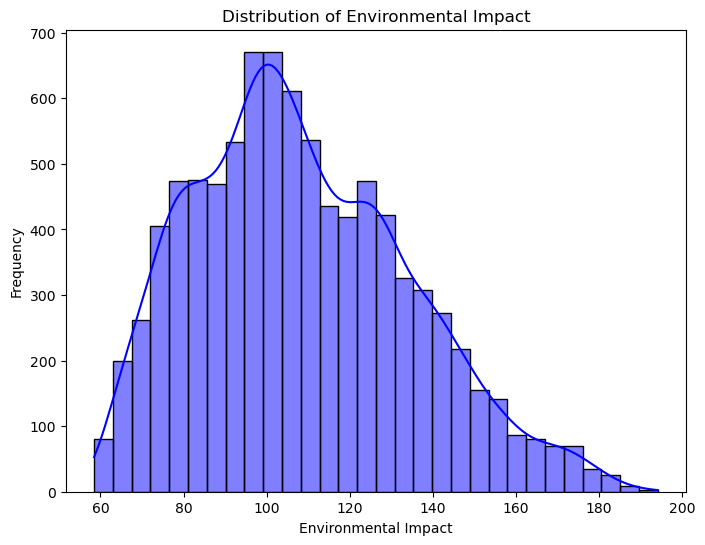

In [56]:
# Plot the distribution of Environmental Impact
plt.figure(figsize=(8, 6))
sns.histplot(df['Environmental Impact'], kde=True, color='blue', bins=30)
plt.title('Distribution of Environmental Impact')
plt.xlabel('Environmental Impact')
plt.ylabel('Frequency')
plt.show()


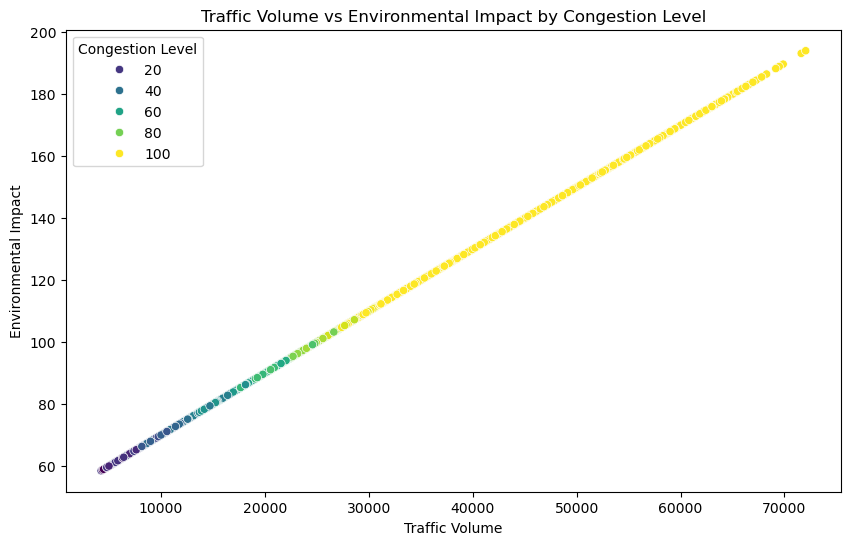

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Volume', y='Environmental Impact', hue='Congestion Level', data=df, palette='viridis')
plt.title('Traffic Volume vs Environmental Impact by Congestion Level')
plt.xlabel('Traffic Volume')
plt.ylabel('Environmental Impact')
plt.show()


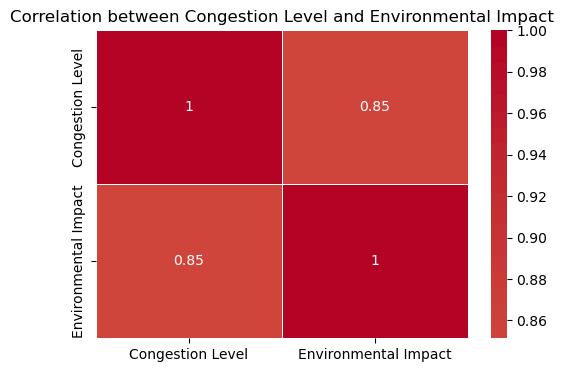

In [58]:
# Convert categorical 'Congestion Level' to numeric if necessary (if it's categorical)
df['Congestion Level'] = df['Congestion Level'].astype('category').cat.codes

# Compute correlation
corr = df[['Congestion Level', 'Environmental Impact']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation between Congestion Level and Environmental Impact')
plt.show()


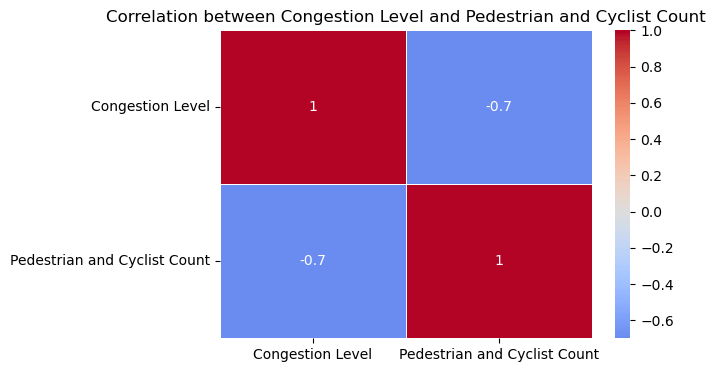

In [59]:
# Convert categorical 'Congestion Level' to numeric if necessary (if it's categorical)
df['Congestion Level'] = df['Congestion Level'].astype('category').cat.codes

# Compute correlation
corr = df[['Congestion Level', 'Pedestrian and Cyclist Count']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation between Congestion Level and Pedestrian and Cyclist Count')
plt.show()


In [60]:
df.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

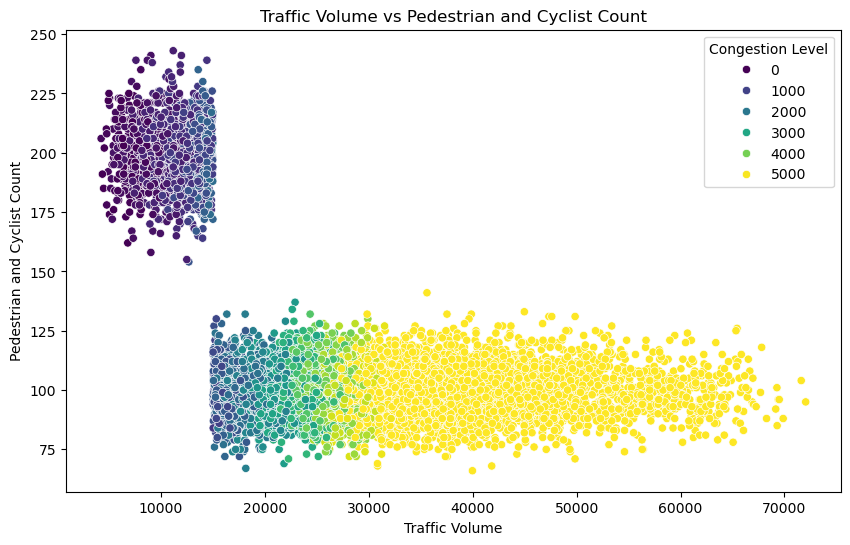

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Volume', y='Pedestrian and Cyclist Count', hue='Congestion Level', data=df, palette='viridis')
plt.title('Traffic Volume vs Pedestrian and Cyclist Count')
plt.xlabel('Traffic Volume')
plt.ylabel('Pedestrian and Cyclist Count')
plt.show()


### FEATURE ENGINEERING

In [63]:
df1 = df.copy()

In [64]:
df1.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

### FEATURE ENGINEERING

### Traffic Density: High Traffic Volume relative to road capacity may indicate to higher congestion

In [67]:
df['Traffic Density'] = df['Traffic Volume'] / df['Road Capacity Utilization']

In [68]:
df['Traffic Density']

0       505.900000
1       308.250000
2       203.288638
3       608.740000
4       572.920000
           ...    
8931    198.537215
8932    364.770000
8933    428.220000
8934    209.922728
8935    189.169251
Name: Traffic Density, Length: 8936, dtype: float64

### Speed to capacity ratio: compare the average speed to the road's capacity because lower speed relative to road capacity indicates higher congestion

In [70]:
df['Speed to Capacity Ratio'] = df['Average Speed'] / df['Road Capacity Utilization']

### Weather-Adjusted Traffic Volume- poor weather condtions could reduce traffic flow, so we can multiply traffic volume by a weather related factor

In [72]:
df.head()
df['Weather Conditions'].unique()

array(['Clear', 'Overcast', 'Fog', 'Rain', 'Windy'], dtype=object)

In [73]:
weather_factors = {
    "Clear": 1.0,        
    "Overcast": 0.95,    
    "Fog": 0.8,          
    "Rain": 0.9,         
    "Windy": 0.85        
}


In [74]:

df['Weather Factor'] = df['Weather Conditions'].map(weather_factors)

df['Weather Adjusted Traffic Volume'] = df['Traffic Volume'] * df['Weather Factor']

df.head()


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,5052,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,505.900000,0.502303,1.0,50590.0
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,5052,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,308.250000,0.293771,1.0,30825.0
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,291,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,203.288638,1.496692,1.0,7399.0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,5052,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,608.740000,0.438176,1.0,60874.0
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,5052,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,572.920000,0.411168,1.0,57292.0


In [75]:
df['Weather Adjusted Traffic Volume']
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,5052,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,505.900000,0.502303,1.0,50590.0
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,5052,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,308.250000,0.293771,1.0,30825.0
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,291,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,203.288638,1.496692,1.0,7399.0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,5052,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,608.740000,0.438176,1.0,60874.0
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,5052,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,572.920000,0.411168,1.0,57292.0


C:\Users\akash\AppData\Local\Temp\ipykernel_15912\817854240.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Weather Conditions', y='Congestion Level', ci=None, palette='viridis')
C:\Users\akash\AppData\Local\Temp\ipykernel_15912\817854240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Weather Conditions', y='Congestion Level', ci=None, palette='viridis')


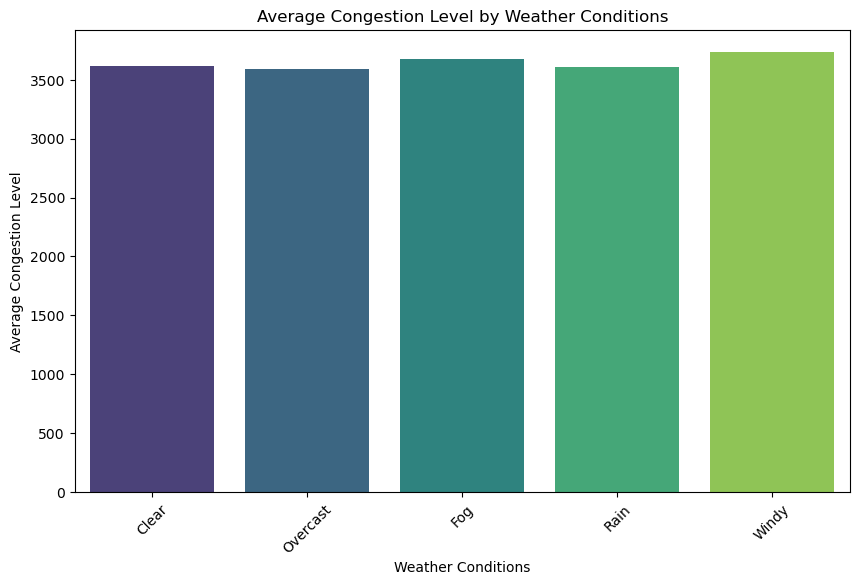

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Weather Conditions', y='Congestion Level', ci=None, palette='viridis')
plt.title('Average Congestion Level by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Congestion Level')
plt.xticks(rotation=45)
plt.show()


In [80]:
df['Weather Conditions'].value_counts()

Weather Conditions
Clear       5426
Overcast    1296
Fog          959
Rain         827
Windy        428
Name: count, dtype: int64

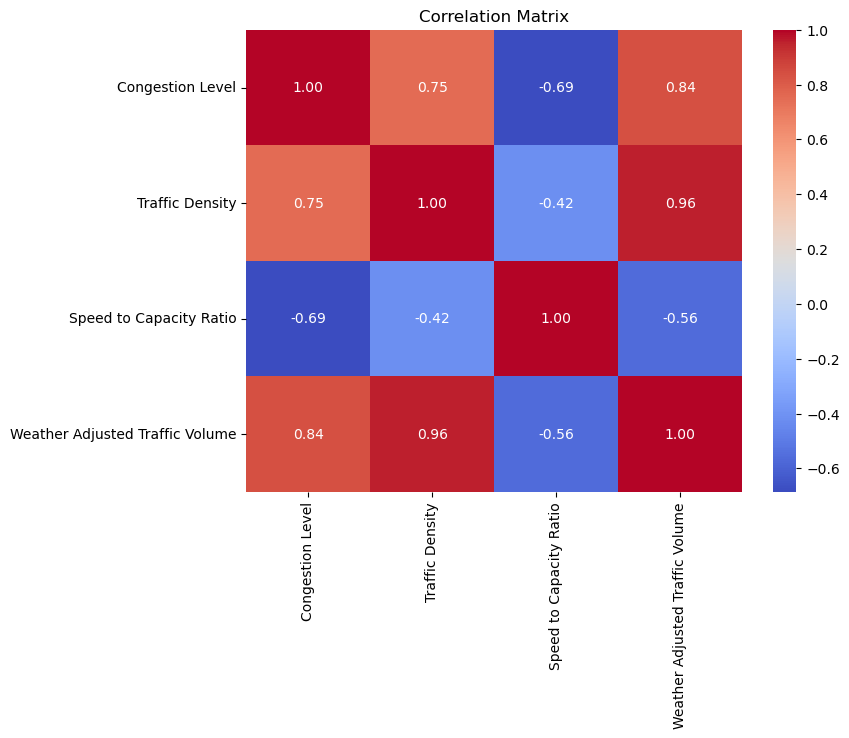

In [82]:
# Compute correlation
correlation_matrix = df[['Congestion Level', 'Traffic Density', 'Speed to Capacity Ratio', 'Weather Adjusted Traffic Volume']].corr()

# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### GETTING THE IMPORTANT FEATURES TO PREDICT THE CONGESTION LEVEL


In [85]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Congestion Level']) 
#removing the congestion level from x 
y = df['Congestion Level']
#target variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [87]:
#checking the shape of the splits we have done
print(f"training  data shape: {X_train.shape}")

training  data shape: (7148, 19)


In [89]:
#checking the shape of the splits we have done
print(f"testing  data shape: {X_test.shape}")

testing  data shape: (1788, 19)


In [91]:
df

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,5052,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,505.900000,0.502303,1.0,50590.0
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,5052,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,308.250000,0.293771,1.0,30825.0
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,291,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,203.288638,1.496692,1.0,7399.0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,5052,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,608.740000,0.438176,1.0,60874.0
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,5052,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,572.920000,0.411168,1.0,57292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,555,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,No,198.537215,0.408691,0.8,9109.6
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,5052,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,No,364.770000,0.451684,1.0,36477.0
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,5052,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,No,428.220000,0.220286,1.0,42822.0
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,2795,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,No,209.922728,0.534054,1.0,20540.0


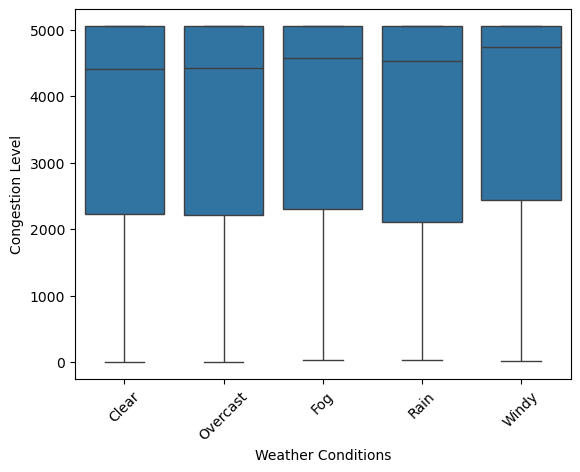

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relation between weather conditions and congestion level
sns.boxplot(x='Weather Conditions', y='Congestion Level', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [95]:
from sklearn.preprocessing import LabelEncoder

In [97]:
label_encoder = LabelEncoder()

#encoding the weather condition and roadwork and construction
df['Weather Conditions'] = label_encoder.fit_transform(df['Weather Conditions'])

In [99]:
df['Weather Conditions']

0       0
1       0
2       0
3       0
4       0
       ..
8931    1
8932    0
8933    0
8934    0
8935    3
Name: Weather Conditions, Length: 8936, dtype: int32

In [101]:
df['Roadwork and Construction Activity'] = label_encoder.fit_transform(df['Roadwork and Construction Activity'])

In [103]:
df['Roadwork and Construction Activity'].unique()

array([0, 1])

In [106]:
categorical_cols = ['Area Name', 'Road/Intersection Name', 'Weather Conditions', 'Roadwork and Construction Activity']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [108]:
df['Area Name'].unique

<bound method Series.unique of 0           Indiranagar
1           Indiranagar
2            Whitefield
3           Koramangala
4           Koramangala
             ...       
8931    Electronic City
8932          M.G. Road
8933          M.G. Road
8934          Jayanagar
8935       Yeshwanthpur
Name: Area Name, Length: 8936, dtype: object>

In [110]:
df['Road/Intersection Name'].unique

<bound method Series.unique of 0             100 Feet Road
1                  CMH Road
2       Marathahalli Bridge
3       Sony World Junction
4             Sarjapur Road
               ...         
8931             Hosur Road
8932         Trinity Circle
8933     Anil Kumble Circle
8934       South End Circle
8935    Yeshwanthpur Circle
Name: Road/Intersection Name, Length: 8936, dtype: object>

In [112]:
df['Area_Road'] = df['Area Name'] + "-" + df['Road/Intersection Name']

In [114]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,...,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume,Area_Road
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,5052,100.000000,0,151.180,...,84.044600,85.403629,111,0,0,505.900000,0.502303,1.0,50590.0,Indiranagar-100 Feet Road
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,5052,100.000000,1,111.650,...,91.407038,59.983689,100,0,0,308.250000,0.293771,1.0,30825.0,Indiranagar-CMH Road
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,291,36.396525,0,64.798,...,61.375541,95.466020,189,0,0,203.288638,1.496692,1.0,7399.0,Whitefield-Marathahalli Bridge
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,5052,100.000000,1,171.748,...,75.547092,63.567452,111,0,0,608.740000,0.438176,1.0,60874.0,Koramangala-Sony World Junction
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,5052,100.000000,3,164.584,...,64.634762,93.155171,104,0,0,572.920000,0.411168,1.0,57292.0,Koramangala-Sarjapur Road


In [116]:
# Feature Engineering: Extract date-related features from the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int)

In [118]:
df.describe()

,Date,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,...,Weather Conditions,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume,Day_of_Week,Month,Year,Is_Weekend
count,8936,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,...,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,2023-04-22 05:25:11.548791552,29236.048120,39.447427,1.375554,3623.634064,92.029215,1.570389,108.472096,45.086651,79.950243,...,0.866607,0.098702,308.456471,0.464395,0.954846,27908.719561,2.986235,5.976611,2022.851723,0.286705
min,2022-01-01 00:00:00,4233.000000,20.000000,1.000039,0.000000,18.739771,0.000000,58.466000,10.006853,60.003933,...,0.000000,0.000000,168.309623,0.200000,0.800000,3817.600000,0.000000,1.000000,2022.000000,0.000000
25%,2022-08-26 00:00:00,19413.000000,31.775825,1.242459,2233.750000,97.354990,0.000000,88.826000,27.341191,69.828270,...,0.000000,0.000000,210.588208,0.325163,0.950000,18386.000000,1.000000,3.000000,2022.000000,0.000000
50%,2023-04-24 00:00:00,27600.000000,39.199368,1.500000,4467.500000,100.000000,1.000000,105.200000,45.170684,79.992773,...,0.000000,0.000000,276.000000,0.410073,1.000000,26447.750000,3.000000,6.000000,2023.000000,0.000000
75%,2023-12-17 06:00:00,38058.500000,46.644517,1.500000,5052.000000,100.000000,2.000000,126.117000,62.426485,89.957358,...,2.000000,0.000000,380.585000,0.520363,1.000000,36423.237500,5.000000,9.000000,2023.000000,1.000000
max,2024-08-09 00:00:00,72039.000000,89.790843,1.500000,5052.000000,100.000000,10.000000,194.078000,79.979744,99.993652,...,4.000000,1.000000,720.390000,3.355231,1.000000,72039.000000,6.000000,12.000000,2024.000000,1.000000
std,NaN,13001.808801,10.707244,0.165319,1664.720239,16.583341,1.420047,26.003618,20.208460,11.585006,...,1.239302,0.298278,111.163978,0.242140,0.067971,12600.333867,2.007967,3.336125,0.772103,0.452248


In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Area_Road'] = le.fit_transform(df['Area_Road'])
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,...,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume,Area_Road,Day_of_Week,Month,Year,Is_Weekend
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,5052,100.000000,0,151.180,...,0,505.900000,0.502303,1.0,50590.0,4,5,1,2022,1
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,5052,100.000000,1,111.650,...,0,308.250000,0.293771,1.0,30825.0,5,5,1,2022,1
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,291,36.396525,0,64.798,...,0,203.288638,1.496692,1.0,7399.0,13,5,1,2022,1
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,5052,100.000000,1,171.748,...,0,608.740000,0.438176,1.0,60874.0,9,5,1,2022,1
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,5052,100.000000,3,164.584,...,0,572.920000,0.411168,1.0,57292.0,8,5,1,2022,1


In [125]:
features = ['Area_Road', 'Day_of_Week', 'Month', 'Year', 'Is_Weekend', 'Traffic Volume', 'Average Speed', 'Traffic Density', 'Weather Factor', 'Speed to Capacity Ratio']


In [127]:
target = 'Congestion Level'

In [129]:
X = df[features]
y = df[target]

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#train the model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [137]:
#evaluate the model performance
y_pred = rf_model.predict(X_test)
print("model performance")
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

model performance
Mean Squared Error 98144.84410559284
R2 Score:  0.9639681490865913


In [153]:
#trying with only important newly created features
features1 = ['Traffic Density', 'Speed to Capacity Ratio', 'Weather Adjusted Traffic Volume']

In [155]:
target1 = 'Congestion Level'

In [159]:
X = df[features1]
y = df[target1]

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#train the model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [165]:
#evaluate the model performance
y_pred = rf_model.predict(X_test)
print("model performance")
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

model performance
Mean Squared Error 124020.56005341162
R2 Score:  0.9544684148131698


In [179]:
features2 = ['Area_Road', 'Day_of_Week', 'Month', 'Year', 'Is_Weekend', 'Traffic Volume', 'Average Speed', 'Traffic Density', 'Weather Factor', 'Speed to Capacity Ratio', 'Weather Adjusted Traffic Volume']
target2 = "Congestion Level"
X = df[features2]
y = df[target2]

In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#train the model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [182]:
#evaluate the model performance
y_pred = rf_model.predict(X_test)
print("model performance")
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

model performance
Mean Squared Error 98739.56364233782
R2 Score:  0.9637498101012013


In [185]:
features3 = ['Area Name' ,'Road/Intersection Name' 'Day_of_Week', 'Month', 'Year', 'Is_Weekend', 'Traffic Volume', 'Average Speed', 'Traffic Density', 'Weather Factor', 'Speed to Capacity Ratio']


In [189]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,...,Roadwork and Construction Activity,Traffic Density,Speed to Capacity Ratio,Weather Factor,Weather Adjusted Traffic Volume,Area_Road,Day_of_Week,Month,Year,Is_Weekend
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,5052,100.000000,0,151.180,...,0,505.900000,0.502303,1.0,50590.0,4,5,1,2022,1
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,5052,100.000000,1,111.650,...,0,308.250000,0.293771,1.0,30825.0,5,5,1,2022,1
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,291,36.396525,0,64.798,...,0,203.288638,1.496692,1.0,7399.0,13,5,1,2022,1
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,5052,100.000000,1,171.748,...,0,608.740000,0.438176,1.0,60874.0,9,5,1,2022,1
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,5052,100.000000,3,164.584,...,0,572.920000,0.411168,1.0,57292.0,8,5,1,2022,1


In [218]:
# Select numerical features for correlation matrix
numerical_features1 = df[[
    "Congestion Level", "Average Speed", "Travel Time Index", 
    "Road Capacity Utilization", "Incident Reports", 
    "Environmental Impact", "Public Transport Usage", 
    "Traffic Signal Compliance", "Parking Usage", 
    "Pedestrian and Cyclist Count", "Traffic Density", 
    "Speed to Capacity Ratio", "Weather Factor", 
    "Weather Adjusted Traffic Volume", "Area_Road"
]]

# Compute the correlation matrix
correlation_matrix = numerical_features1.corr()

# Display the correlation matrix
print(correlation_matrix)


                                 Congestion Level  Average Speed  \
Congestion Level                         1.000000      -0.374769   
Average Speed                           -0.374769       1.000000   
Travel Time Index                        0.781746      -0.376170   
Road Capacity Utilization                0.815992      -0.249886   
Incident Reports                         0.420727      -0.158863   
Environmental Impact                     0.851379      -0.341138   
Public Transport Usage                  -0.003310       0.024437   
Traffic Signal Compliance               -0.001451       0.000644   
Parking Usage                           -0.022951       0.000161   
Pedestrian and Cyclist Count            -0.698524       0.209209   
Traffic Density                          0.749871      -0.323517   
Speed to Capacity Ratio                 -0.685256       0.656918   
Weather Factor                          -0.013607       0.000808   
Weather Adjusted Traffic Volume          0.83725

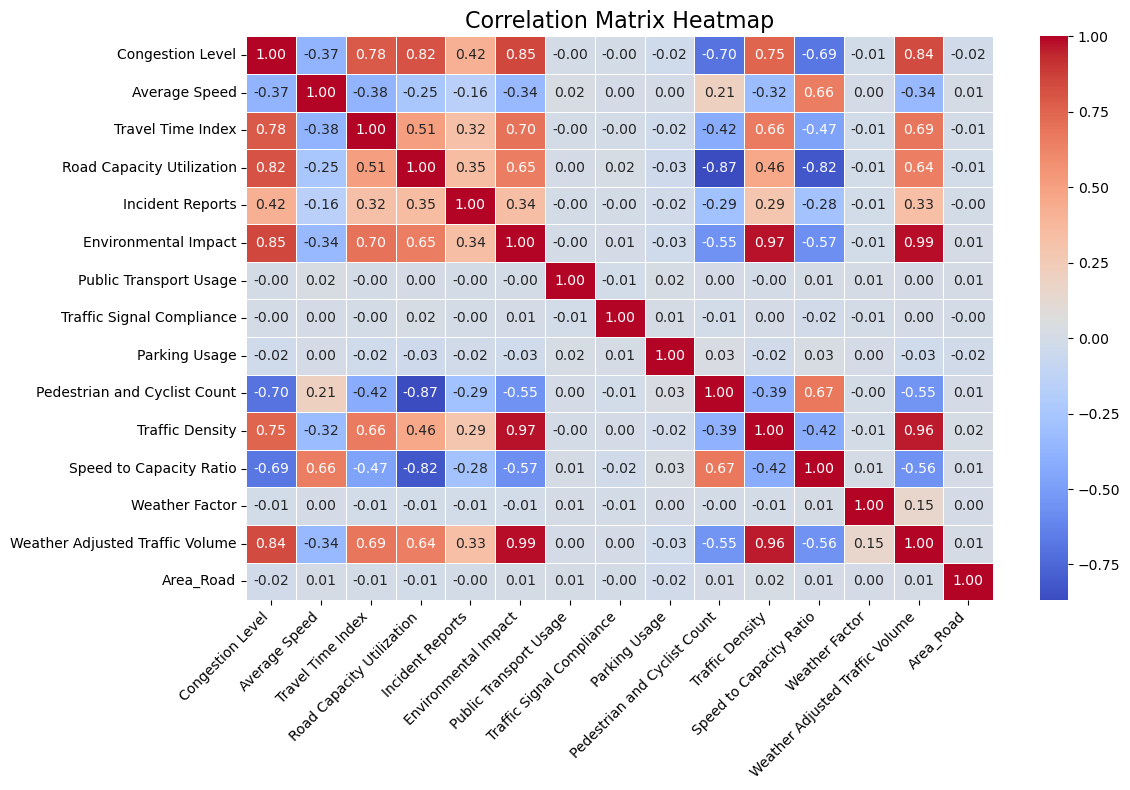

In [220]:
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()